<a href="https://colab.research.google.com/github/BharathReddyRamasani/AI_DS/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')
df.head(15)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [11]:
df.isna().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [14]:
x=df.iloc[:,2:4].values
y=df.iloc[:,-1].values

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy')
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm


array([[47,  5],
       [ 6, 22]])

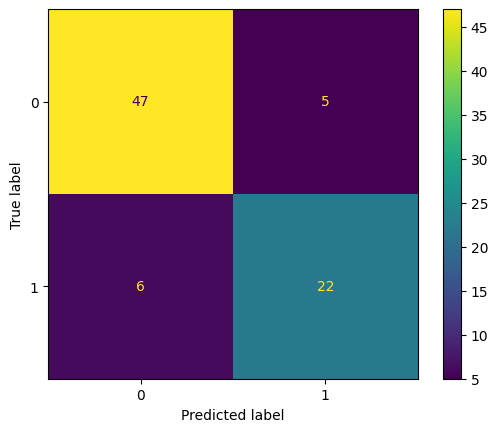

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [21]:
accuracy_score(y_test,y_pred)

0.8625

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        52
           1       0.81      0.79      0.80        28

    accuracy                           0.86        80
   macro avg       0.85      0.84      0.85        80
weighted avg       0.86      0.86      0.86        80



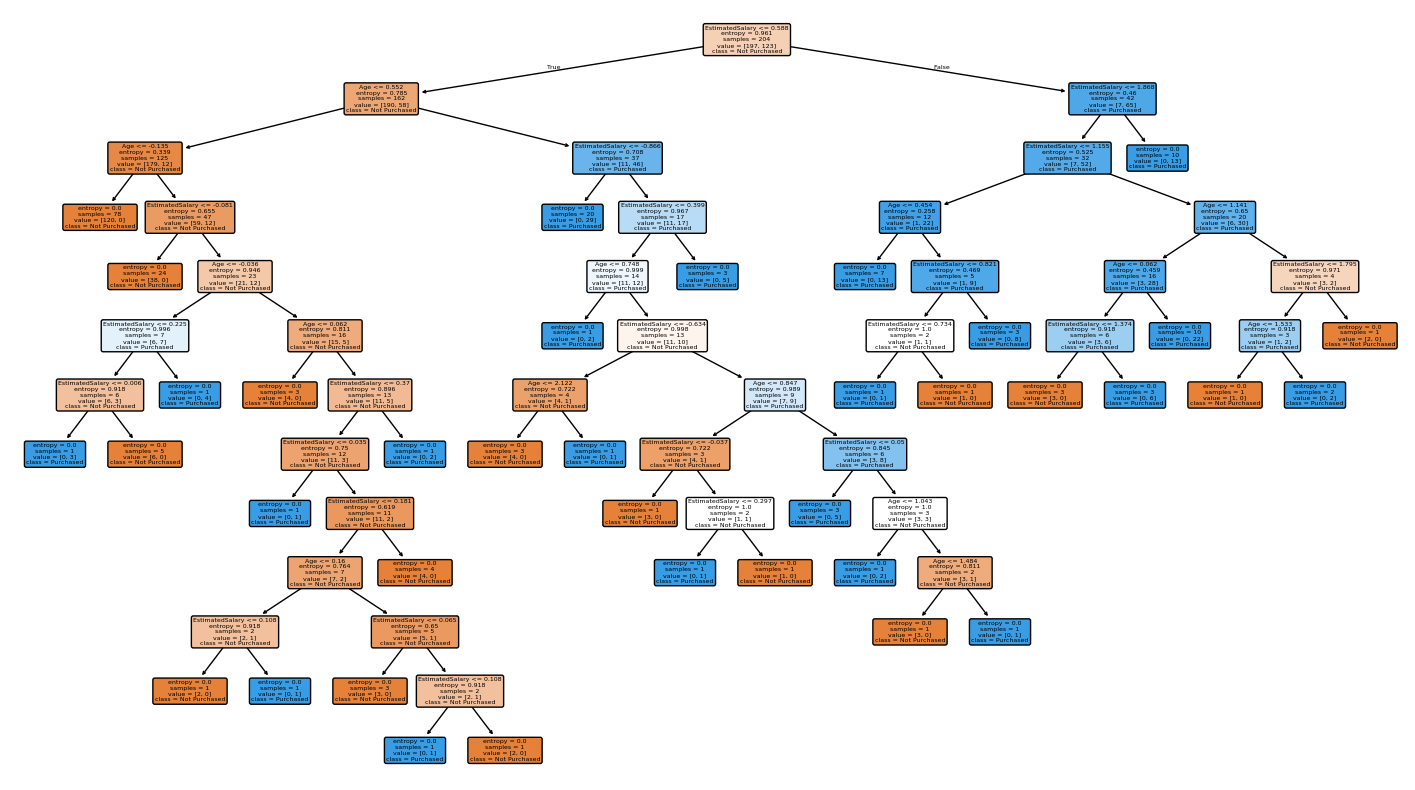

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(
    classifier.estimators_[0],
    filled=True,
    feature_names=['Age','EstimatedSalary'],
    class_names=['Not Purchased','Purchased'],
    rounded = True
)
plt.show()

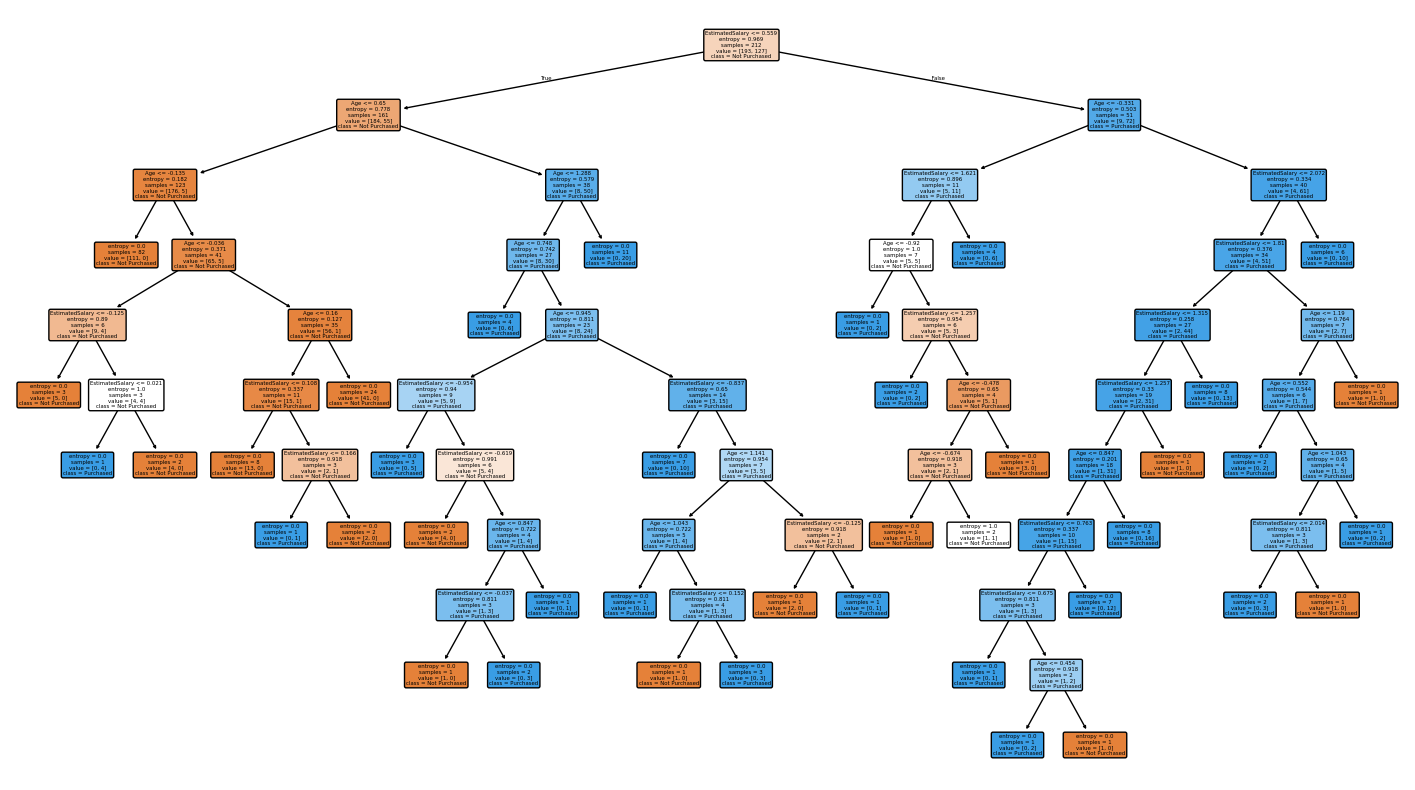

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(
    classifier.estimators_[1],
    filled=True,
    feature_names=['Age','EstimatedSalary'],
    class_names=['Not Purchased','Purchased'],
    rounded = True
)
plt.show()

credit card fraud dection

In [47]:
df=pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [48]:
df.isna().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [49]:
df.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [50]:
count_classes = pd.value_counts(df['Class'], sort=True)
print("\nClass Distribution:\n", count_classes)


Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


/tmp/ipython-input-2673138208.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort=True)


IQR: 71.56
Lower Bound: -101.75 | Upper Bound: 184.51
Number of Outliers detected: 31904
Percentage of Outliers: 11.20%


Text(0.5, 1.0, 'Boxplot of Transaction Amount')

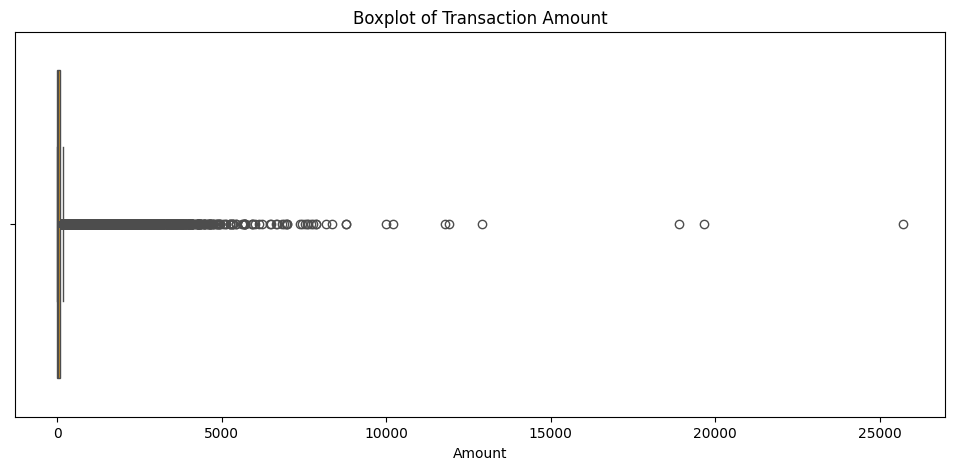

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f} | Upper Bound: {upper_bound:.2f}")

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print(f"Number of Outliers detected: {len(outliers)}")
print(f"Percentage of Outliers: {(len(outliers)/len(df))*100:.2f}%")

plt.figure(figsize=(12, 5))

sns.boxplot(x=df['Amount'], color='orange')
plt.title('Boxplot of Transaction Amount')

In [41]:
# from sklearn.preprocessing import RobustScaler
# import numpy as np

# scaler = RobustScaler()

# df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

# df.drop(['Amount'], axis=1, inplace=True)

# print("Scaling Complete.")
# print(df.head())


In [40]:

# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10,4))
# sns.histplot(df['scaled_amount'], bins=50, kde=True, color='green')
# plt.title('Distribution after Robust Scaling')
# plt.xlabel('Scaled Amount (Median centered at 0)')
# plt.show()

In [52]:
import numpy as np

df['Amount_log'] = np.log1p(df['Amount'])

In [53]:
X = df.drop('Class', axis=1)
y = df['Class']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [69]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    criterion='entropy'

)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [70]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = dt_model.predict(X_test)

dt_cm = confusion_matrix(y_test, y_pred)
print("Decision Tree Confusion Matrix:\n", dt_cm)
print(classification_report(y_test, y_pred))

Decision Tree Confusion Matrix:
 [[56833    31]
 [   21    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.79      0.75        98

    accuracy                           1.00     56962
   macro avg       0.86      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9990871107053826


In [64]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=25,criterion='entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25)

In [65]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm


array([[56863,     1],
       [   21,    77]])

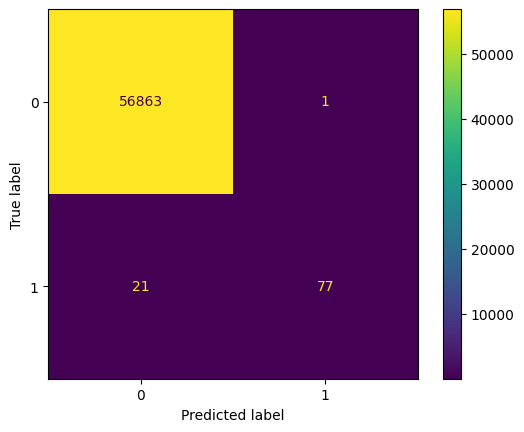

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.79      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [68]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9996137776061234


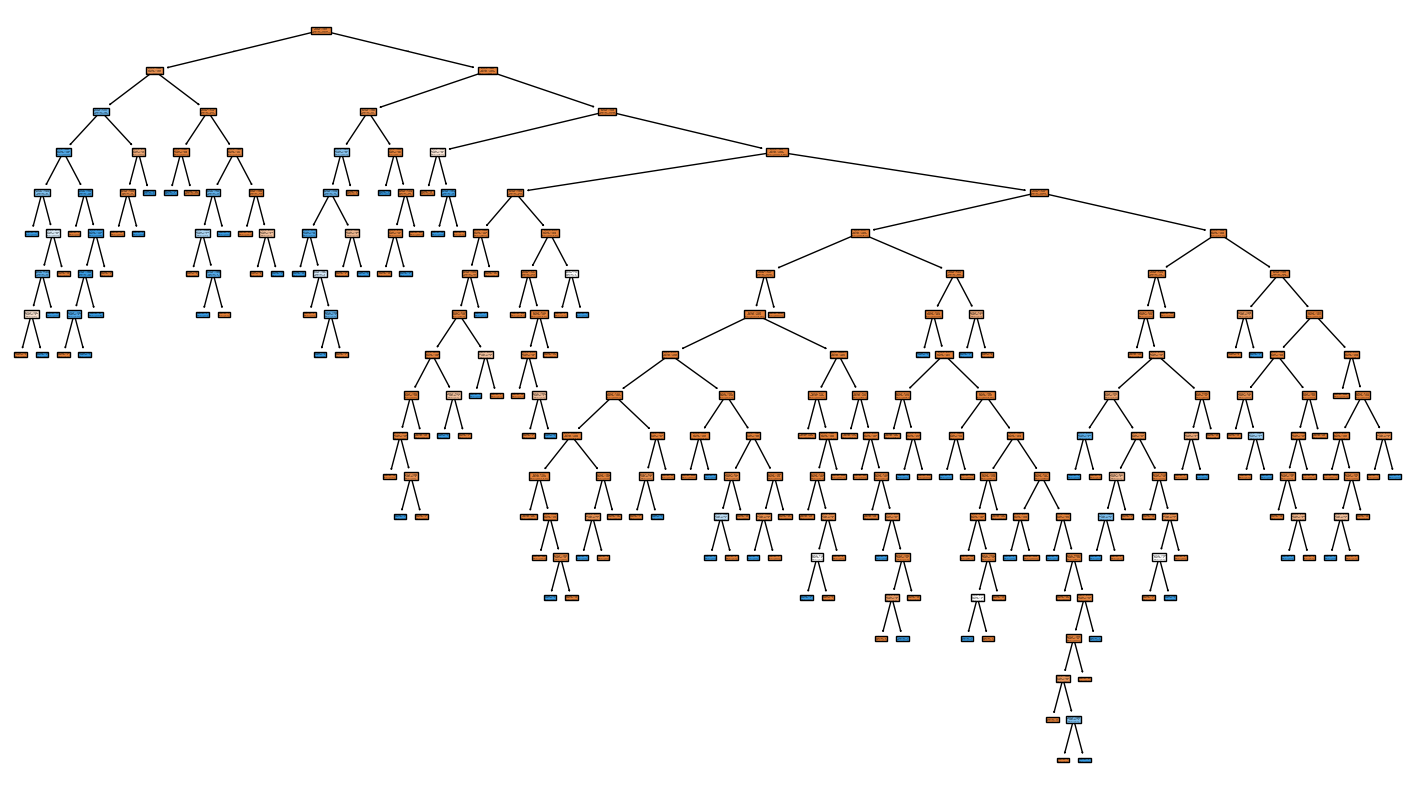

In [73]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(
    classifier.estimators_[0],
    filled=True)
plt.show()

In [74]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print(f"Total Fraudulent Transactions in Test Set: {tp + fn}")
print(f"7a. Correcty Detected (True Positives): {tp}")
print(f"7b. Incorrectly Flagged Legitimate (False Positives): {fp}")
print(f"Missed Fraud (False Negatives): {fn}")

Total Fraudulent Transactions in Test Set: 98
7a. Correcty Detected (True Positives): 77
7b. Incorrectly Flagged Legitimate (False Positives): 31
Missed Fraud (False Negatives): 21


In [75]:

threshold = df['Amount'].quantile(0.95)
y_rule_pred = (X_test['Amount'] > threshold).astype(int)

from sklearn.metrics import accuracy_score, recall_score
rule_accuracy = accuracy_score(y_test, y_rule_pred)
rule_recall = recall_score(y_test, y_rule_pred)

print(f"Rule-Based Accuracy: {rule_accuracy:.4f}")
print(f"Rule-Based Recall: {rule_recall:.4f}")

Rule-Based Accuracy: 0.9483
Rule-Based Recall: 0.1327


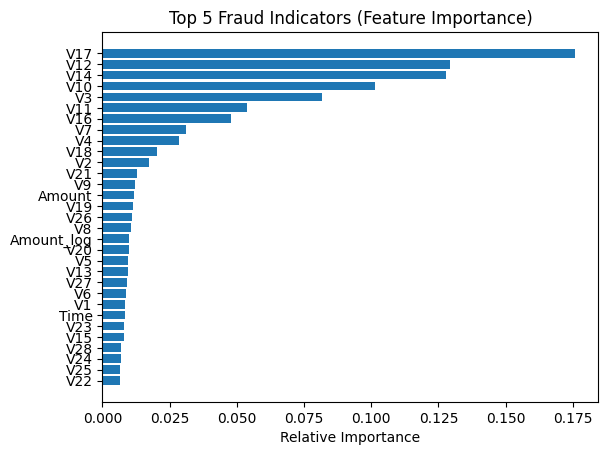

In [77]:

import matplotlib.pyplot as plt

importances = classifier.feature_importances_
indices = np.argsort(importances)[-50:]

plt.title('Top 5 Fraud Indicators (Feature Importance)')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()